# --- Import Libraries ---

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Upload Dataset ---

In [275]:
# load the horses dataset into df
df = pd.read_csv('data/Horses.csv')

# --- Quick Dataset Exploration ---

In [276]:
# display a sample of the df
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


In [277]:
# display summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RaceID              36819 non-null  int64  
 1   HorseID             36819 non-null  int64  
 2   Cloth               36819 non-null  int64  
 3   Stall               36615 non-null  float64
 4   WeightValue         36819 non-null  int64  
 5   JockeyID            36818 non-null  float64
 6   AllowanceValue      1609 non-null   float64
 7   OverweightValue     106 non-null    float64
 8   TrainerID           36819 non-null  int64  
 9   OwnerID             36616 non-null  float64
 10  LastRunDaysFlat     34300 non-null  float64
 11  Age                 36616 non-null  float64
 12  Blinkers            10342 non-null  float64
 13  Hood                0 non-null      float64
 14  Visor               68 non-null     float64
 15  EyeShield           0 non-null      float64
 16  Eyec

In [278]:
# display stats of df
df.describe()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,DamSireID,YearBorn,MeetingID,RaceNumber,HorseCount,Runners,Course_Distance,Handicap,CourseID,Won
count,3.681900e+04,3.681900e+04,36819.000000,36615.000000,36819.000000,3.681800e+04,1609.000000,106.000000,3.681900e+04,3.661600e+04,...,3.681400e+04,5160.000000,36819.000000,36819.000000,36819.000000,36799.000000,36819.000000,17406.000000,36819.000000,36819.000000
mean,1.009771e+06,2.929157e+06,7.052446,7.053093,126.604389,1.259822e+06,5.702921,1.320755,1.222769e+06,1.384368e+06,...,2.143072e+06,2010.779070,89455.046878,5.018387,13.048236,11.685861,1576.295364,0.996610,369.899182,0.078954
std,1.144299e+04,5.846940e+04,4.208096,4.207354,6.066849,1.340399e+05,2.416773,0.834348,1.257340e+05,1.238528e+05,...,1.539233e+05,0.970004,1328.259877,2.643495,3.351323,2.660330,396.336788,0.058123,31.985672,0.269670
min,9.894180e+05,2.261982e+06,1.000000,1.000000,101.000000,1.000173e+06,1.000000,1.000000,1.029939e+06,1.002822e+06,...,2.000346e+06,2007.000000,87048.000000,1.000000,0.000000,4.000000,875.000000,0.000000,325.000000,0.000000
25%,9.995280e+05,2.901713e+06,4.000000,4.000000,122.000000,1.140012e+06,3.000000,1.000000,1.140038e+06,1.291745e+06,...,2.005847e+06,2010.000000,88270.000000,3.000000,11.000000,10.000000,1312.000000,1.000000,351.000000,0.000000
50%,1.010457e+06,2.942103e+06,7.000000,7.000000,128.000000,1.248797e+06,6.000000,1.000000,1.183787e+06,1.429344e+06,...,2.113386e+06,2011.000000,89544.000000,5.000000,13.000000,12.000000,1531.000000,1.000000,367.000000,0.000000
75%,1.020003e+06,2.973182e+06,10.000000,10.000000,132.000000,1.390206e+06,9.000000,1.000000,1.288992e+06,1.480139e+06,...,2.222698e+06,2011.000000,90630.000000,7.000000,15.000000,14.000000,1750.000000,1.000000,380.000000,0.000000
max,1.029387e+06,3.013308e+06,30.000000,30.000000,148.000000,1.503269e+06,9.000000,6.000000,1.502153e+06,1.503181e+06,...,3.024790e+06,2014.000000,91584.000000,13.000000,30.000000,27.000000,3938.000000,1.000000,442.000000,1.000000


In [279]:
# display missing values
print(df.isnull().sum())

RaceID                    0
HorseID                   0
Cloth                     0
Stall                   204
WeightValue               0
JockeyID                  1
AllowanceValue        35210
OverweightValue       36713
TrainerID                 0
OwnerID                 203
LastRunDaysFlat        2519
Age                     203
Blinkers              26477
Hood                  36819
Visor                 36751
EyeShield             36819
Eyecover              36819
TongueStrap           36819
CheekPieces           36819
ForecastPrice          1727
StatCourse            27987
StatDistance          29691
StatCourseDistance    29363
StartingPrice          4810
Bred                      0
DamID                     5
SireID                    5
DamSireID                 5
Sex                       5
Colour                    5
YearBorn              31659
MeetingID                 0
RaceNumber                0
ScheduledTime             0
HorseCount                0
Runners             

In [280]:
# count and display the number of exact duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of exact duplicate rows:", duplicate_rows)

Number of exact duplicate rows: 0


Findings:
- 'ScheduledTime' & 'MeetingDate' has placeholder values ('##########')
- Many columns e.g. 'AllowanceValue', 'OverweightValue' & accessories like 'Hood' and 'Visor' are mostly empty with little values inputted 
- 'ForecastPrice' & 'StartingPrice' are an object with datetime and numerical values (assuming it should be purely numerical as its 'price')
- 'Colour' has '/' which seems like ir could be an error/typo, or it could mean something that hasn't been defined

# --- Initial Data Cleaning ---
### ***Clean Dataset Briefly***

In [281]:
# replace placeholder values in 'ScheduledTime' and 'MeetingDate'
placeholder_cols = ['ScheduledTime', 'MeetingDate']
for col in placeholder_cols:
    df[col] = df[col].replace('##########', np.nan)

df.head()

C:\Users\diani\AppData\Local\Temp\ipykernel_13060\4020293483.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('##########', np.nan)


,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


In [282]:
# clean 'ForecastPrice' and 'StartingPrice' columns
def clean_price_column(col):
    return pd.to_numeric(df[col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

df['ForecastPrice'] = clean_price_column('ForecastPrice')
df['StartingPrice'] = clean_price_column('StartingPrice')

In [283]:
# check that the changes have been made correctly
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


### ***Handle Main Missing Values***

In [284]:
# calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# display columns with high missing values (70% or more)
print(missing_percentage[missing_percentage >= 70])

AllowanceValue         95.629974
OverweightValue        99.712105
Blinkers               71.911241
Hood                  100.000000
Visor                  99.815313
EyeShield             100.000000
Eyecover              100.000000
TongueStrap           100.000000
CheekPieces           100.000000
StatCourse             76.012385
StatDistance           80.640430
StatCourseDistance     79.749586
YearBorn               85.985497
ScheduledTime         100.000000
dtype: float64


In [285]:
# drop columns with more than 70% missing values
df = df.dropna(thresh=df.shape[0] * 0.3, axis=1)

In [286]:
# check remaining columns after dropping columns with high missing values 
print(df.isnull().sum())

RaceID                 0
HorseID                0
Cloth                  0
Stall                204
WeightValue            0
JockeyID               1
TrainerID              0
OwnerID              203
LastRunDaysFlat     2519
Age                  203
ForecastPrice       1727
StartingPrice       4810
Bred                   0
DamID                  5
SireID                 5
DamSireID              5
Sex                    5
Colour                 5
MeetingID              0
RaceNumber             0
HorseCount             0
Runners               20
Going                378
Weather              378
Course_Distance        0
RaceType              51
TrackType             51
Handicap           19413
eligibility           51
CourseID               0
MeetingDate            0
Won                    0
dtype: int64


### ***Understand the Remain Columns***

In [287]:
categorical_features = df.select_dtypes(include=[object]).columns
print("Categorical Features:")
categorical_features

Categorical Features:


Index(['Bred', 'Sex', 'Colour', 'Going', 'Weather', 'RaceType', 'TrackType',
       'eligibility', 'MeetingDate'],
      dtype='object')

In [288]:
numeric_features = df.select_dtypes(include=[np.number]).columns

print("Numeric Features:")
numeric_features

Numeric Features:


Index(['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'JockeyID',
       'TrainerID', 'OwnerID', 'LastRunDaysFlat', 'Age', 'ForecastPrice',
       'StartingPrice', 'DamID', 'SireID', 'DamSireID', 'MeetingID',
       'RaceNumber', 'HorseCount', 'Runners', 'Course_Distance', 'Handicap',
       'CourseID', 'Won'],
      dtype='object')

# --- Exploratory Data Analysis ---
### ***Missing Values & Data Quality***

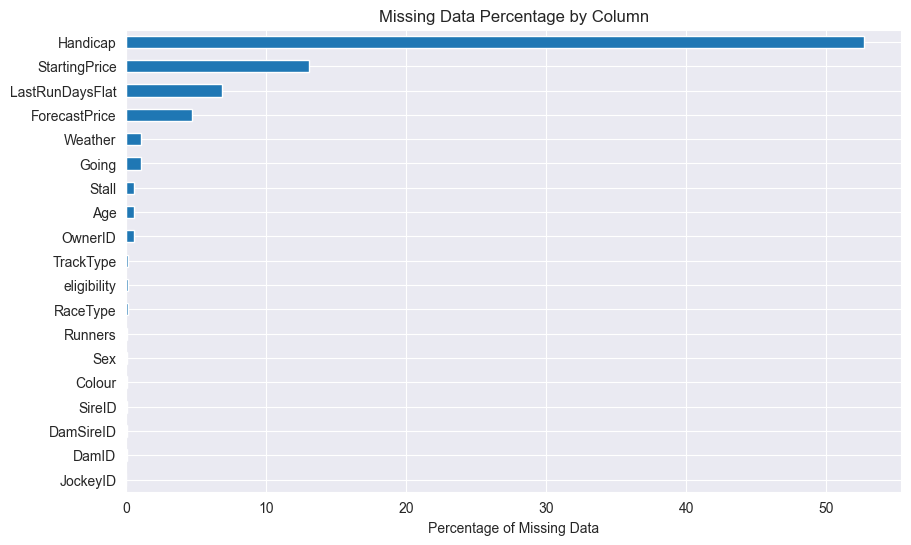

In [289]:
# remaining missing values by column
missing_percentage = df.isnull().mean() * 100
missing_data_chart = missing_percentage[missing_percentage > 0].sort_values()

# plot bar chart
missing_data_chart.plot(kind='barh', figsize=(10, 6))
plt.title('Missing Data Percentage by Column')
plt.xlabel('Percentage of Missing Data')
plt.show()

- Even after removing columns with more than 70% missing data, several columns in the dataset still contain missing values. Notably, the 'Handicap' column has over 50% of its data missing. Given the significant proportion of missing data, imputing values in such columns could lead to biased or misleading results. In this case, it would be best to drop the column entirely if it is not essential for future analysis.
- For other columns with missing values, different imputation strategies can be applied:
  - Categorical variables: the mode or a placeholder such as "Unknown" could be suitable.
  - Numerical columns: mean or median imputation may be more appropriate, depending on the data distribution.
  - Columns with a high percentage of missing values: dropping the column could be a more effective option to avoid introducing bias.

### ***Outlier Detection***

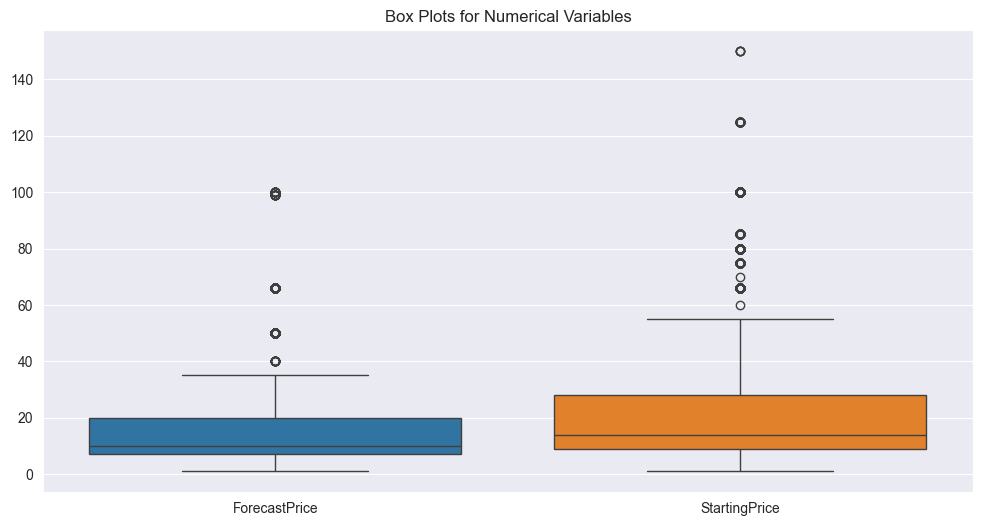

In [290]:
# plot boxplot 
numerical_columns = ['ForecastPrice', 'StartingPrice']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Numerical Variables')
plt.show()

- This boxplot shows the distribution of 'ForecastPrice' and 'StartingPrice' with a visual representation of the median, quartiles (Q1 and Q3) and potential outliers.
- The wider whiskers and more outliers in the 'StartingPrice' boxplot suggests that it highly unpredictable and that there could be more factors influencing the final price before the race, e.g. external factors like betting activity, last-minute changes or market conditions. This indicates that the 'StartingPrice' might reflect real-time market forces more than 'ForecastPrice,' which could be calculated earlier or based on other factors.
- Since both 'ForecastPrice' and 'StartingPrice' are left-skewed, this suggests that most prices are lower and the higher price points could represent special cases (e.g. well-known horses or major races). The skewness also reflects how the majority of horses might be priced lower, with only a few exceptional cases driving higher prices.
- Both 'ForecastPrice' and 'StartingPrice' contain some missing data, with 'StartingPrice' having a notably higher proportion of missing values. This missing data could lead to bias or errors in the analysis if it is not handled carefully. 

### ***Top 10 Most Frequent Trainers***

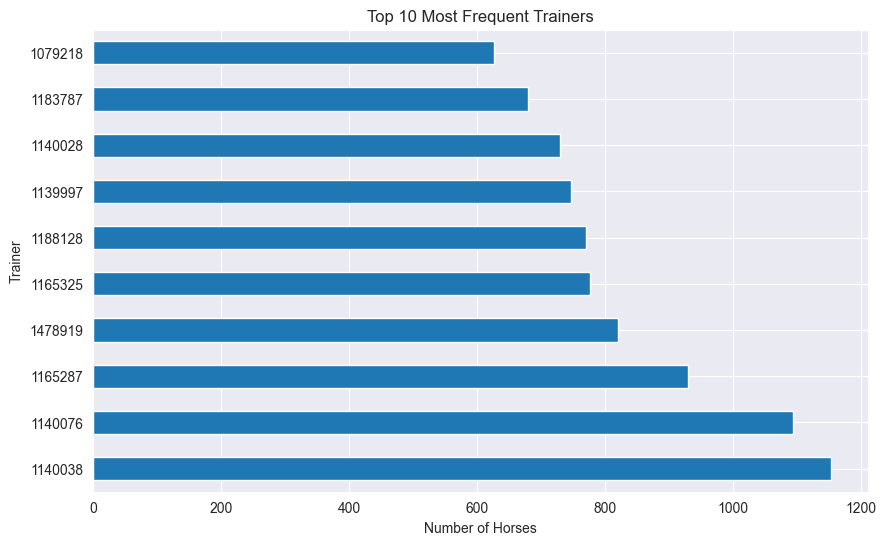

In [291]:
# top 10 most frequent trainers   
top_trainers = df['TrainerID'].value_counts().head(10)

# plot bar chart 
plt.figure(figsize=(10, 6))
top_trainers.plot(kind='barh')
plt.title('Top 10 Most Frequent Trainers')
plt.xlabel('Number of Horses')
plt.ylabel('Trainer')
plt.show()

- This shows which trainers have the most horses participating in races, indicating their influence on the racing industry. 
- Trainers with the most horses (such as Trainer 1140038) may well-established in the racing industry with a large network of owners and horses, therefore, these trainers are likely to be very active and have extensive experience managing multiple horses in races.
- Having a large number of horses could allow trainers to experiment with different strategies and training approaches, which can improve their success rate and help in adapting to different race conditions or competitors.

### ***Win Rate of Top 10 Most Frequent Trainers***

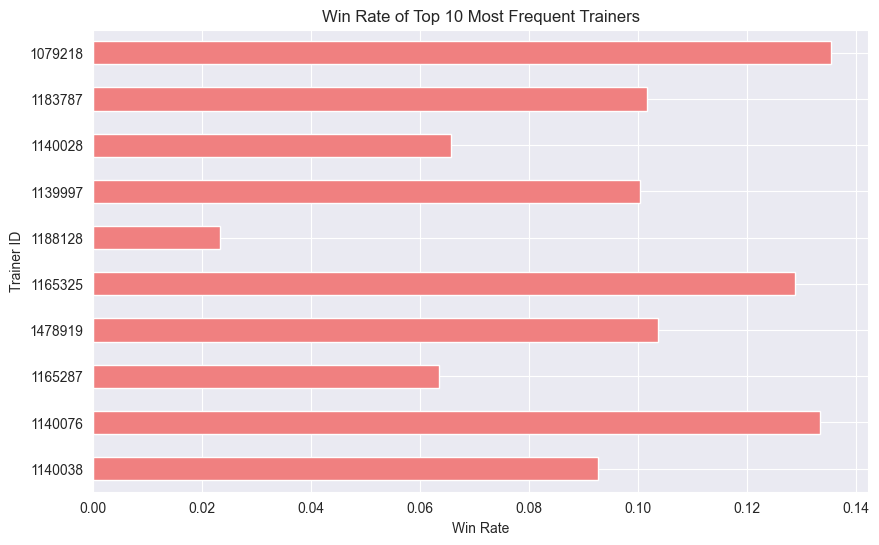

In [292]:
# count total races and wins per trainer
trainer_stats = df.groupby('TrainerID').agg(
    races_entered=('TrainerID', 'count'),
    races_won=('Won', 'sum'))


# calculate win rate
trainer_stats['win_rate'] = trainer_stats['races_won'] / trainer_stats['races_entered']  

# top 10 trainers by races entered  
top_trainers_win_rate = trainer_stats.nlargest(10, 'races_entered')  

# plot bar chart  
plt.figure(figsize=(10, 6))  
top_trainers_win_rate['win_rate'].plot(kind='barh', color='lightcoral')  

plt.title('Win Rate of Top 10 Most Frequent Trainers')  
plt.xlabel('Win Rate')  
plt.ylabel('Trainer ID')  
plt.show()  

- This analysis helps us understand the relationship between the number of races entered and the number of races won by each trainer. 
- While Trainer 1140038 trained the most horses, Trainer 1079218 (who ranked 10th in horses trained) had the highest win rate. This highlights that the number of horses trained does not always correlate with success. Trainers with fewer horses may focus on quality, while those with more may have a broader pool, influencing their win rate.
- Information about trainer win rates can be valuable for bettors when predicting race outcomes. A higher win rate could make certain trainers more favorable, but analysing race conditions (e.g., horse age, weather) and specific race types could provide additional insight.

### ***Count of Horses by Colour***

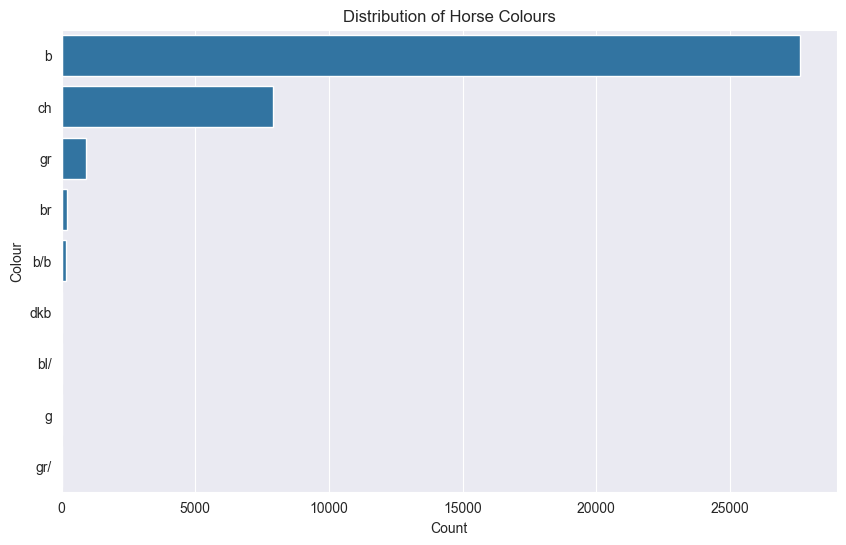

In [293]:
# plot bar chart 
plt.figure(figsize=(10, 6))
sns.countplot(y='Colour', data=df, order=df['Colour'].value_counts().index)
plt.title('Distribution of Horse Colours')
plt.xlabel('Count')
plt.ylabel('Colour')
plt.show()

- This plot shows the distribution of horse colours in the dataset. 
- Colour 'b' is the most dominant, which could reflect a significant trend in the industry. This may be linked to factors such as breeding practices, cultural preferences or external influences like betting trends or marketability. 



In [294]:
### ***Distribution of Horse Ages***

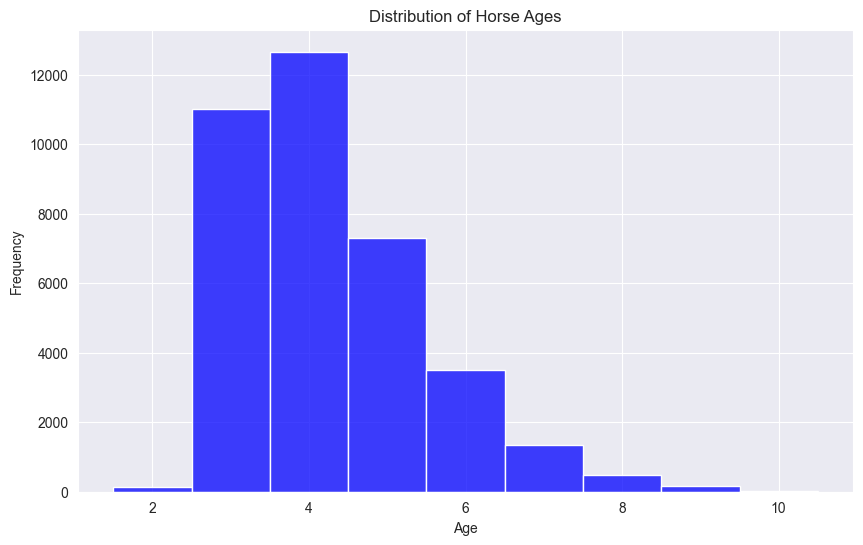

In [295]:
# plot a histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, color='blue', bins=20, discrete=True)
plt.title('Distribution of Horse Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- This histogram shows the distribution of horse ages, with the highest concentration of horses between the ages of 3 and 5. The distribution is left-skewed, with age 4 being the most common. After age 4, there is a noticeable decline in the number of horses, suggesting that fewer horses race as they get older.
- The drop in the number of horses over age 4 may indicate that the racing industry tends to favour younger horses for competition. Older horses may be moved to other roles, such as breeding or retirement.

# --- Conclusion ---

The EDA of the horse dataset provides many valuable insights into horse racing, trainers and their performance. 

Some of the key findings include:
- **Trainer Performance:** Certain trainers are more frequently involved in races and their win rates offer insights into their experience and success rates. This could suggest a correlation between a trainer’s experience and performance. 

- **Age Distribution of Horses:** The dataset reveals that most horses are between 3 and 5 years old, indicating that younger horses tend to be used in races. This could influence decisions related to breeding, training, or scheduling of races. 

- **Colour of Horses:** The majority of horses are identified with the colour 'b', which raises questions about the relationship between a horse's colour and its race success, or whether certain colours are preferred by owners or trainers. 

- **Data Quality and Outliers:** Outliers were identified in several key numerical columns, such as 'StartingPrice' and 'ForecastPrice'. These should be handled with care in further analysis, as they could skew results or reflect underlying market conditions. 



# --- Future Considerations ---

- **Data Quality:** It is essential to address missing values properly before conducting any analysis to ensure data quality and avoid inaccurate conclusions. Additionally, future data collection should focus on ensuring complete and accurate data, which would improve the reliability of future analyses.

- **Variability in Starting Price:** Further investigation could be done to explore the reasons behind the higher variability in 'StartingPrice'. This might involve analysing factors such as horse reputation, trainer performance or race-day conditions. Additionally, exploring correlations between outliers and specific race events or external factors could provide deeper insights into the drivers of these fluctuations.

- **Horse Colour and Performance:** Given the significant gap between the top two horse colours, it may be valuable to explore whether certain trainers, owners or races are more likely to feature horses of colour 'b'. Investigating the relationship between horse colour and win rates could also offer valuable insights into performance trends.

- **Trainer Performance under Specific Conditions:** Exploring whether certain trainers perform better under specific conditions (e.g. weather, horse age, track surface) or in particular race types could uncover patterns that help optimise training and race strategies.

- **Jockey and Horse Performance Analysis:** A similar approach could be applied to analysing jockey and horse performance, identifying patterns in their success rates across different conditions and race types.

- **Age and Race Type Correlation:** Investigating whether younger horses perform better in races or if certain race types are more common among specific age groups could lead to further insights into the impact of age on performance.